# Support vector Machine(SVM)

**Linear SVM-Email Spam Classifier**

* In this notebook will build a linear SVM classifier to clasify emails into Ham and Spam.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
#load the data
df = pd.read_csv("Spam.csv")
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [12]:
df.shape

(4601, 58)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [14]:
df["spam"].describe()

count    4601.000000
mean        0.394045
std         0.488698
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam, dtype: float64

In [15]:
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

# Data Preparation

In [16]:
#Spliting data

X = df.drop(["spam"],axis = 1)
y = df["spam"]

In [17]:
#scaling data
#X = X -mean(x)/std(X)

from sklearn.preprocessing import scale
X = scale(X)

In [27]:
#split data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 2)

In [21]:
print(y_train.mean())
print(y_test.mean())

0.3884057971014493
0.4109470026064292


# Model building

In [23]:
from sklearn.svm import SVC
model = SVC()

In [28]:
#fit the data
model.fit(X_train,y_train)

#prediction
y_pred = model.predict(X_test)

In [36]:
#Evaluatiing model
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[652,  26],
       [ 65, 408]], dtype=int64)

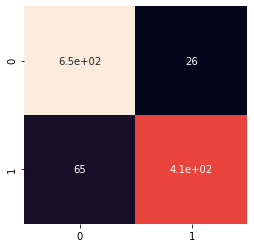

In [37]:
#visulaize confuion matrix
fig,ax = plt.subplots(figsize = (4,4))
ax = sns.heatmap(conf_mat,annot = True,cbar = False)

In [38]:
model.score(X_test,y_test)

0.9209383145091226

In [42]:
clf_rep = classification_report(y_test,y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       678
           1       0.94      0.86      0.90       473

    accuracy                           0.92      1151
   macro avg       0.92      0.91      0.92      1151
weighted avg       0.92      0.92      0.92      1151



In [47]:
#cross val score

#instantiate a model with cost 1

model_1 = SVC(C = 1)

cross_res = cross_val_score(model_1,X_train,y_train,cv = 5,scoring = "accuracy")
cross_res

array([0.93913043, 0.94202899, 0.92608696, 0.94057971, 0.92753623])

In [49]:
print(f"cross val mean accuracy : {np.mean(cross_res)*100:.2f}%")

cross val mean accuracy : 93.51%


In [51]:
model_1.get_params

<bound method BaseEstimator.get_params of SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [53]:
#help(SVC())

In [54]:
svm_grid = {"C":[0.5,1,2,5],
            "kernel":["poly","rbf","sigmoid"],
            "degree":[2,3,4],
            "gamma":["scale","auto"]}

In [55]:
svm_gridcv = GridSearchCV(SVC(),
                          param_grid = svm_grid,
                          cv = 5,
                          scoring = "accuracy",
                          verbose = 2,
                          return_train_score = True)

svm_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] C=0.5, degree=2, gamma=scale, kernel=poly .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.5, degree=2, gamma=scale, kernel=poly, total=   0.4s
[CV] C=0.5, degree=2, gamma=scale, kernel=poly .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ........ C=0.5, degree=2, gamma=scale, kernel=poly, total=   0.5s
[CV] C=0.5, degree=2, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=2, gamma=scale, kernel=poly, total=   0.4s
[CV] C=0.5, degree=2, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=2, gamma=scale, kernel=poly, total=   0.4s
[CV] C=0.5, degree=2, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=2, gamma=scale, kernel=poly, total=   0.4s
[CV] C=0.5, degree=2, gamma=scale, kernel=rbf ........................
[CV] ......... C=0.5, degree=2, gamma=scale, kernel=rbf, total=   0.4s
[CV] C=0.5, degree=2, gamma=scale, kernel=rbf ........................
[CV] ......... C=0.5, degree=2, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=0.5, degree=2, gamma=scale, kernel=rbf ........................
[CV] ......... C=0.5, degree=2, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=0.5, degree=2, gamma=scale, kernel=rbf ........................
[CV] .

[CV] ...... C=0.5, degree=3, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=0.5, degree=4, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=4, gamma=scale, kernel=poly, total=   0.6s
[CV] C=0.5, degree=4, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=4, gamma=scale, kernel=poly, total=   0.6s
[CV] C=0.5, degree=4, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=4, gamma=scale, kernel=poly, total=   0.5s
[CV] C=0.5, degree=4, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=4, gamma=scale, kernel=poly, total=   0.5s
[CV] C=0.5, degree=4, gamma=scale, kernel=poly .......................
[CV] ........ C=0.5, degree=4, gamma=scale, kernel=poly, total=   0.6s
[CV] C=0.5, degree=4, gamma=scale, kernel=rbf ........................
[CV] ......... C=0.5, degree=4, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=0.5, degree=4, gamma=scale, kernel=rbf ........................
[CV] .

[CV] ........ C=1, degree=2, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=1, degree=2, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=1, degree=2, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=1, degree=2, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=1, degree=2, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................
[CV] .......... C=1, degree=3, gamma=scale, kernel=poly, total=   0.4s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................
[CV] .......... C=1, degree=3, gamma=scale, kernel=poly, total=   0.5s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................
[CV] .......... C=1, degree=3, gamma=scale, kernel=poly, total=   0.4s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................
[CV] .......... C=1, degree=3, gamma=scale, kernel=poly, total=   0.4s
[CV] C=1, degree=3, gamma=scale, kernel=poly .........................
[CV] .

[CV] ........ C=1, degree=4, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=1, degree=4, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=1, degree=4, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=1, degree=4, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=1, degree=4, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=1, degree=4, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=1, degree=4, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=1, degree=4, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=1, degree=4, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=2, degree=2, gamma=scale, kernel=poly .........................
[CV] .......... C=2, degree=2, gamma=scale, kernel=poly, total=   0.4s
[CV] C=2, degree=2, gamma=scale, kernel=poly .........................
[CV] .......... C=2, degree=2, gamma=scale, kernel=poly, total=   0.4s
[CV] C=2, degree=2, gamma=scale, kernel=poly .........................
[CV] .

[CV] ............ C=2, degree=3, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=2, degree=3, gamma=auto, kernel=rbf ...........................
[CV] ............ C=2, degree=3, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=2, degree=3, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=2, degree=3, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=2, degree=3, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=2, degree=3, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=2, degree=3, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=2, degree=3, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=2, degree=3, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=2, degree=3, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=2, degree=3, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=2, degree=3, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=2, degree=4, gamma=scale, kernel=poly .........................
[CV] .

[CV] ............ C=5, degree=2, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=2, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=2, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=2, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=2, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=2, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=2, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=2, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=5, degree=2, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=5, degree=2, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=5, degree=2, gamma=auto, kernel=sigmoid, total=   0.3s
[CV] C=5, degree=2, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=5, degree=2, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=5, degree=2, gamma=auto, kernel=sigmoid .......................
[CV] .

[CV] ........... C=5, degree=4, gamma=auto, kernel=poly, total=   0.5s
[CV] C=5, degree=4, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=4, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=4, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=4, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=4, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=4, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=4, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=4, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=4, gamma=auto, kernel=rbf ...........................
[CV] ............ C=5, degree=4, gamma=auto, kernel=rbf, total=   0.3s
[CV] C=5, degree=4, gamma=auto, kernel=sigmoid .......................
[CV] ........ C=5, degree=4, gamma=auto, kernel=sigmoid, total=   0.2s
[CV] C=5, degree=4, gamma=auto, kernel=sigmoid .......................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 2, 5], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [59]:
svm_gridcv.best_params_

{'C': 5, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [60]:
svm_gridcv.score(X_test,y_test)

0.9287576020851434

In [63]:
y_preds = svm_gridcv.predict(X_test)

In [64]:
confusion_matrix(y_test,y_preds)

array([[652,  26],
       [ 56, 417]], dtype=int64)

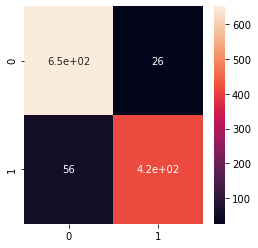

In [66]:
fig,ax = plt.subplots(figsize = (4,4))
ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot = True)

In [67]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       678
           1       0.94      0.88      0.91       473

    accuracy                           0.93      1151
   macro avg       0.93      0.92      0.93      1151
weighted avg       0.93      0.93      0.93      1151

